<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/Regresines_Logisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresiones Logisticas


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Dividir data en data learn y data train
from sklearn.model_selection import train_test_split
#Permite crear un data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
#Metricas para evaluar el modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Verificacion de valores nulos

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Verificar de OutCome
verificar balanceo con un histograma

<Axes: xlabel='Outcome', ylabel='Count'>

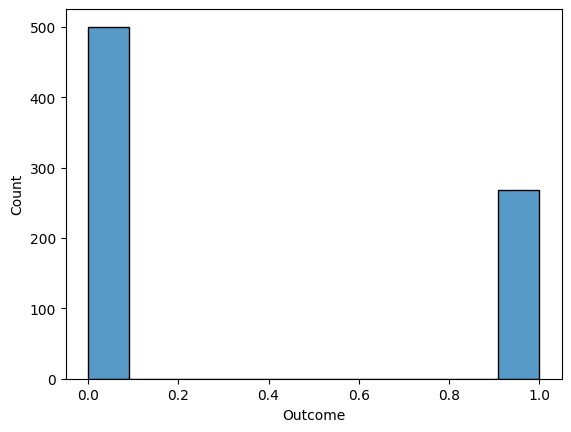

In [9]:
sns.histplot(df['Outcome'])

# Verificación de valores no lógicos

In [13]:
print("Numero de ceros en glucosa: ",df['Glucose'].isin([0]).sum())
print("Numero de ceros en BloodPressure: ",df['BloodPressure'].isin([0]).sum())
print("Numero de ceros en SkinThickness: ",df['SkinThickness'].isin([0]).sum())
print("Numero de ceros en Insulin: ",df['Insulin'].isin([0]).sum())
print("Numero de ceros en BMI: ",df['BMI'].isin([0]).sum())
print("Numero de ceros en DiabetesPedigreeFunction: ",df['DiabetesPedigreeFunction'].isin([0]).sum())
print("Numero de ceros en Age: ",df['Age'].isin([0]).sum())

Numero de ceros en glucosa:  5
Numero de ceros en BloodPressure:  35
Numero de ceros en SkinThickness:  227
Numero de ceros en Insulin:  374
Numero de ceros en BMI:  11
Numero de ceros en DiabetesPedigreeFunction:  0
Numero de ceros en Age:  0


# Sustituyendo valores nulos
*    Glucosa
*    BMI
*    BloodPressure
* Descartamos SkinThinckness y Insuline





In [17]:
dataset = df
dataset['Glucose'].replace(0,df['Glucose'].mean())
dataset['BMI'].replace(0,df['BMI'].mean())
dataset['BloodPressure'].replace(0,df['BloodPressure'].mean())
#Hay muchos valores nulos, lo mejor es hacer un drop
dataset = dataset.drop('Insulin',axis=1)
dataset = dataset.drop('SkinThickness',axis=1)

dataset.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


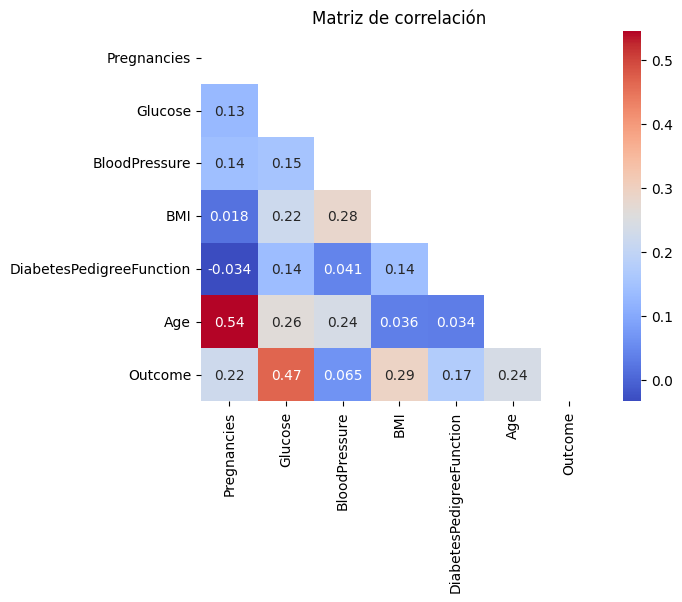

In [20]:
g = dataset.corr()
mask=np.triu(np.ones_like(g))
sns.heatmap(g,annot=True,cmap="coolwarm",mask=mask)
plt.title("Matriz de correlación")
plt.show()

* No es bueno elegir dos variables independientes con una alta de correlación por

*   Es importante tratar los OUTLIERS, no deben estar antes de crear el modelo


# Entrenar el modelo
Debe definir las caracteristicas

**Experimento 1**


---


*   % de datos usar para entrenar (mayor cantidad de registros), %evaluar
*   Usaremos Glucose, BMI y Age



In [37]:
#Seleccionmos las variables explicativas
data1 = dataset
data1 = data1.drop('Pregnancies', axis=1)
data1 = data1.drop('BloodPressure', axis=1)
data1 = data1.drop('DiabetesPedigreeFunction', axis=1)
#Variable objetivo
y = data1["Outcome"]
#Variables explicativas
x=data1.drop("Outcome",axis=1)
#División de dataset en entrenamiento y TEST
#Primero, revuelve los indices, luego, divide el data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=101)

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

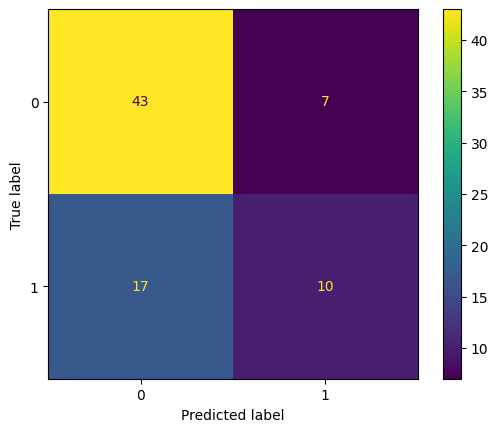

In [38]:
#Evaluación del modelo
y_hat = model.predict(x_test)
#Mostrando la matriz que regresa lo que predijo el modelo
y_hat

#Evaluando resultados
cm = confusion_matrix(y_test,y_hat)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#Eje y lo que paso
#Eje x lo que predijo
#El modelo dijo que habian 29 sin diabetes, cuando tenian
#Modelo predijo que 13 tenian diabetes, en realidad no tenian
#Modelo 87 predijo y realidad no tenain diabetes
#Modelo dijo 25 tenian diabetes y realidad tenian

In [39]:
#Imprimir cuanto acerto
print("Precision: ",metrics.precision_score(y_test,y_hat))
#False negative -> cuanto fallo
print("Recal: ",metrics.recall_score(y_test,y_hat))
#Indica que tan mal estoy, es decir, cuantas unidades funcionaron
print("F1: ",f1_score(y_test,y_hat))

Precision:  0.5882352941176471
Recal:  0.37037037037037035
F1:  0.45454545454545453


** Experimento 2 **


---



In [41]:
#Seleccionmos las variables explicativas
data1 = dataset
data1 = data1.drop('DiabetesPedigreeFunction', axis=1)
#Variable objetivo
y = data1["Outcome"]
#Variables explicativas
x=data1.drop("Outcome",axis=1)
#División de dataset en entrenamiento y TEST
#Primero, revuelve los indices, luego, divide el data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=101)

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

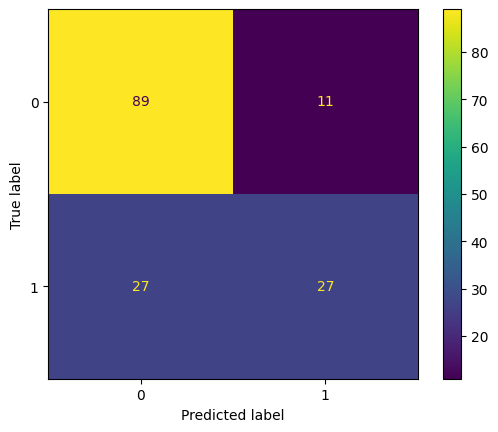

In [42]:
#Evaluación del modelo
y_hat = model.predict(x_test)
#Mostrando la matriz que regresa lo que predijo el modelo
y_hat

#Evaluando resultados
cm = confusion_matrix(y_test,y_hat)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [43]:
#Imprimir cuanto acerto
print("Precision: ",metrics.precision_score(y_test,y_hat))
#False negative -> cuanto fallo
print("Recal: ",metrics.recall_score(y_test,y_hat))
#Indica que tan mal estoy, es decir, cuantas unidades funcionaron
print("F1: ",f1_score(y_test,y_hat))

Precision:  0.7105263157894737
Recal:  0.5
F1:  0.5869565217391304


# Experimento 3
Modificamos outliers

In [54]:
def Modifica_Outliers(dataset,columna):
  q1,q3=np.percentile(dataset[columna],[25,75])
  iqr=q3-q1
  lower_limit=q1 - (1.5*iqr)
  upper_limit=q3+(1.5*iqr)
  dataset[columna] = np.where(dataset[columna]>upper_limit,upper_limit,np.where(dataset[columna]<lower_limit,lower_limit,dataset[columna]))
  return (dataset)

dataset = Modifica_Outliers(dataset,"Pregnancies")
dataset = Modifica_Outliers(dataset,"Glucose")
dataset = Modifica_Outliers(dataset,"BloodPressure")
dataset = Modifica_Outliers(dataset,"BMI")
dataset = Modifica_Outliers(dataset,"Age")

In [55]:
#Seleccionmos las variables explicativas
data1 = dataset
data1 = data1.drop('DiabetesPedigreeFunction', axis=1)
#Variable objetivo
y = data1["Outcome"]
#Variables explicativas
x=data1.drop("Outcome",axis=1)
#División de dataset en entrenamiento y TEST
#Primero, revuelve los indices, luego, divide el data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=101)

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

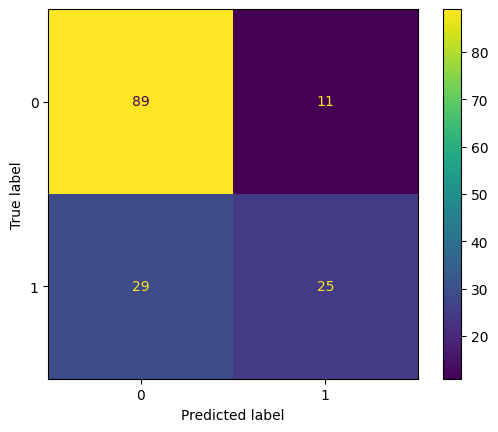

In [56]:
#Evaluación del modelo
y_hat = model.predict(x_test)
#Mostrando la matriz que regresa lo que predijo el modelo
y_hat

#Evaluando resultados
cm = confusion_matrix(y_test,y_hat)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [57]:
#Imprimir cuanto acerto
print("Precision: ",metrics.precision_score(y_test,y_hat))
#False negative -> cuanto fallo
print("Recal: ",metrics.recall_score(y_test,y_hat))
#Indica que tan mal estoy, es decir, cuantas unidades funcionaron
print("F1: ",f1_score(y_test,y_hat))

Precision:  0.6944444444444444
Recal:  0.46296296296296297
F1:  0.5555555555555555
